Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [42]:
library('tidymodels')



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [43]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [44]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 4, 1, 3, 8, 1, 13, 6, 10, 4, 11, 3, …
$ Glucose                  <dbl> 85, 89, 116, 110, 103, 126, 99, 97, 145, 92, …
$ BloodPressure            <dbl> 66, 66, 74, 92, 30, 88, 84, 66, 82, 92, 78, 6…
$ SkinThickness            <dbl> 29, 23, 0, 0, 38, 41, 0, 15, 19, 0, 31, 33, 0…
$ Insulin                  <dbl> 0, 94, 0, 0, 83, 235, 0, 140, 110, 0, 0, 192,…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 37.6, 43.3, 39.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.191, 0.183, 0.704, 0.3…
$ Age                      <dbl> 31, 21, 30, 30, 33, 27, 50, 22, 57, 28, 45, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

In a logistic regression model, the outcome (or dependent) variable should be a binary or categorical variable. In case it's a binary variable, it should have exactly two categories (e.g. 0 and 1).
In this example, it's the "Outcome" variable that should be the outcome (or dependent) variable: we want to build a model to predict if someone has diabetes ("Outcome" variable being 1) or not ("Outcome" variable being 0).

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

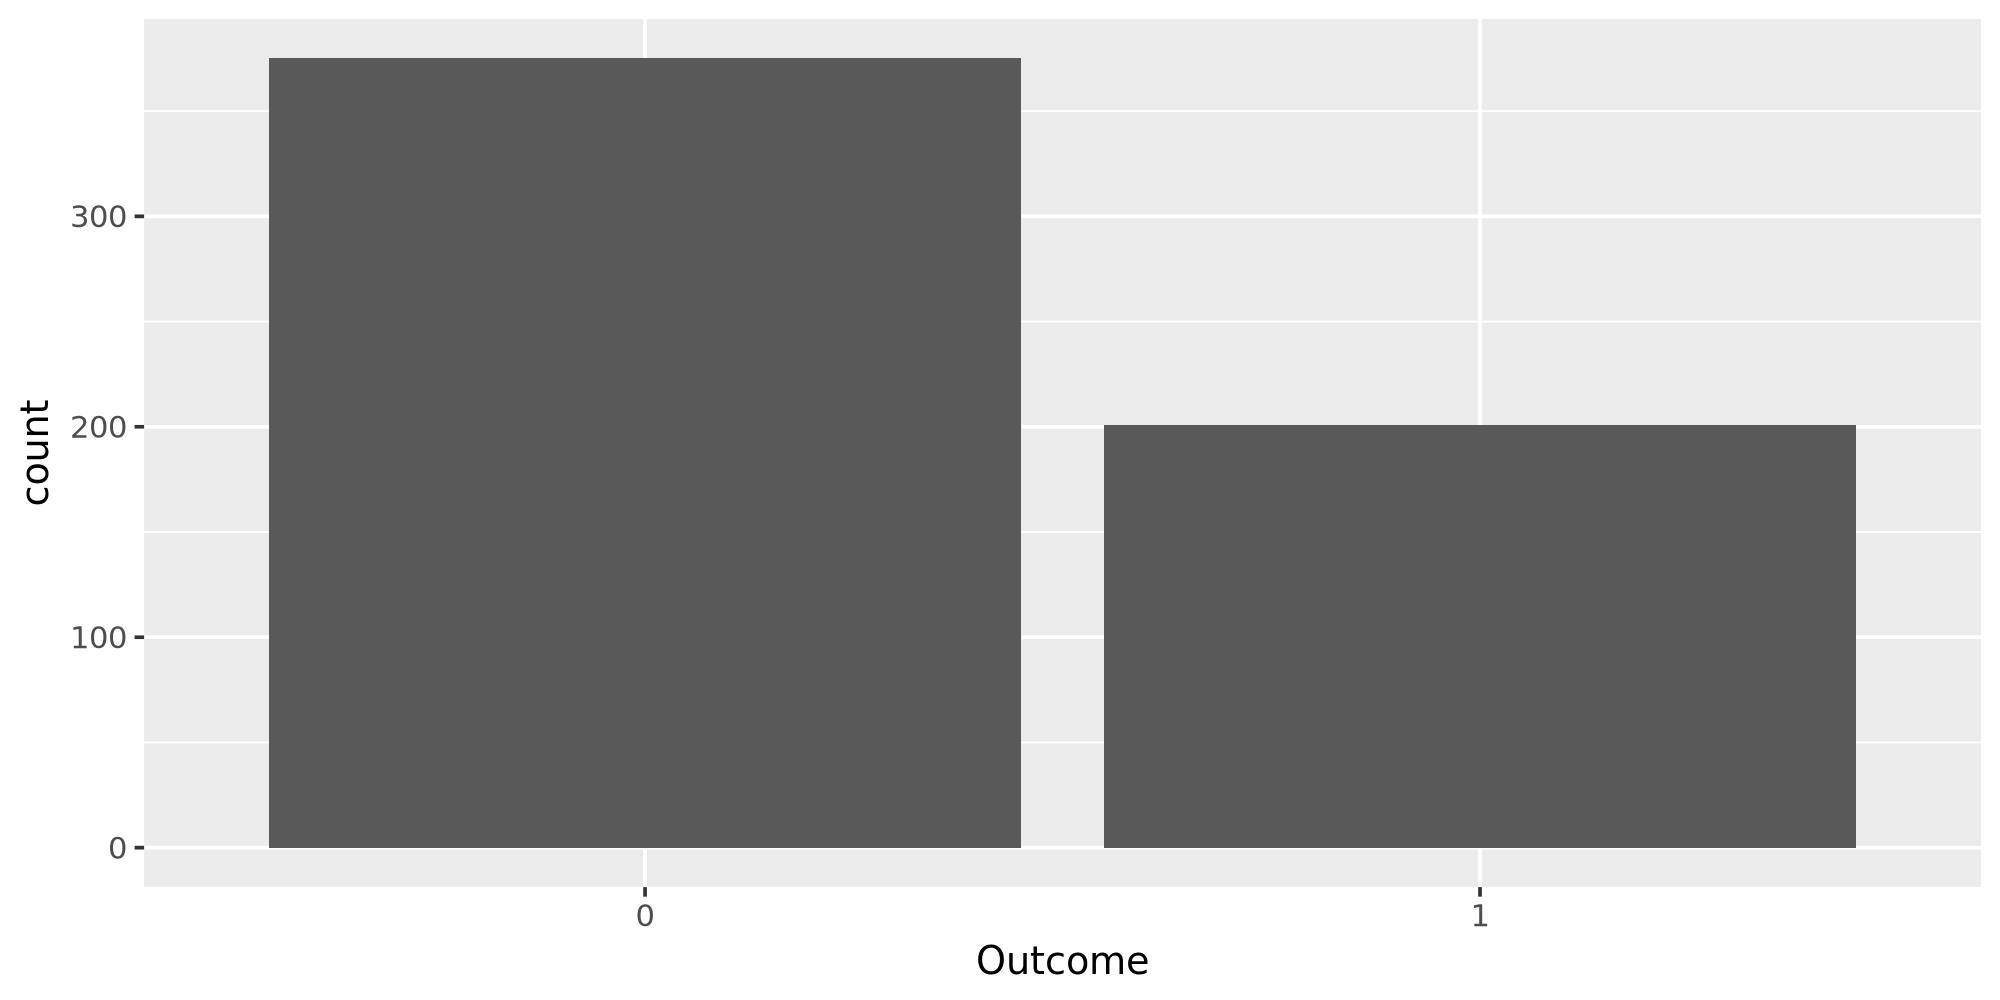

In [45]:
ggplot(diabetes_train, aes(x = Outcome)) +
geom_bar()

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

No, we have approx. 380 records with outcome of 0 whereas only approx. 200 records with outcome of 1 (i.e. approx 380 individuals with no diabetes and approx. 200 individuals with diabetes).



Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [46]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

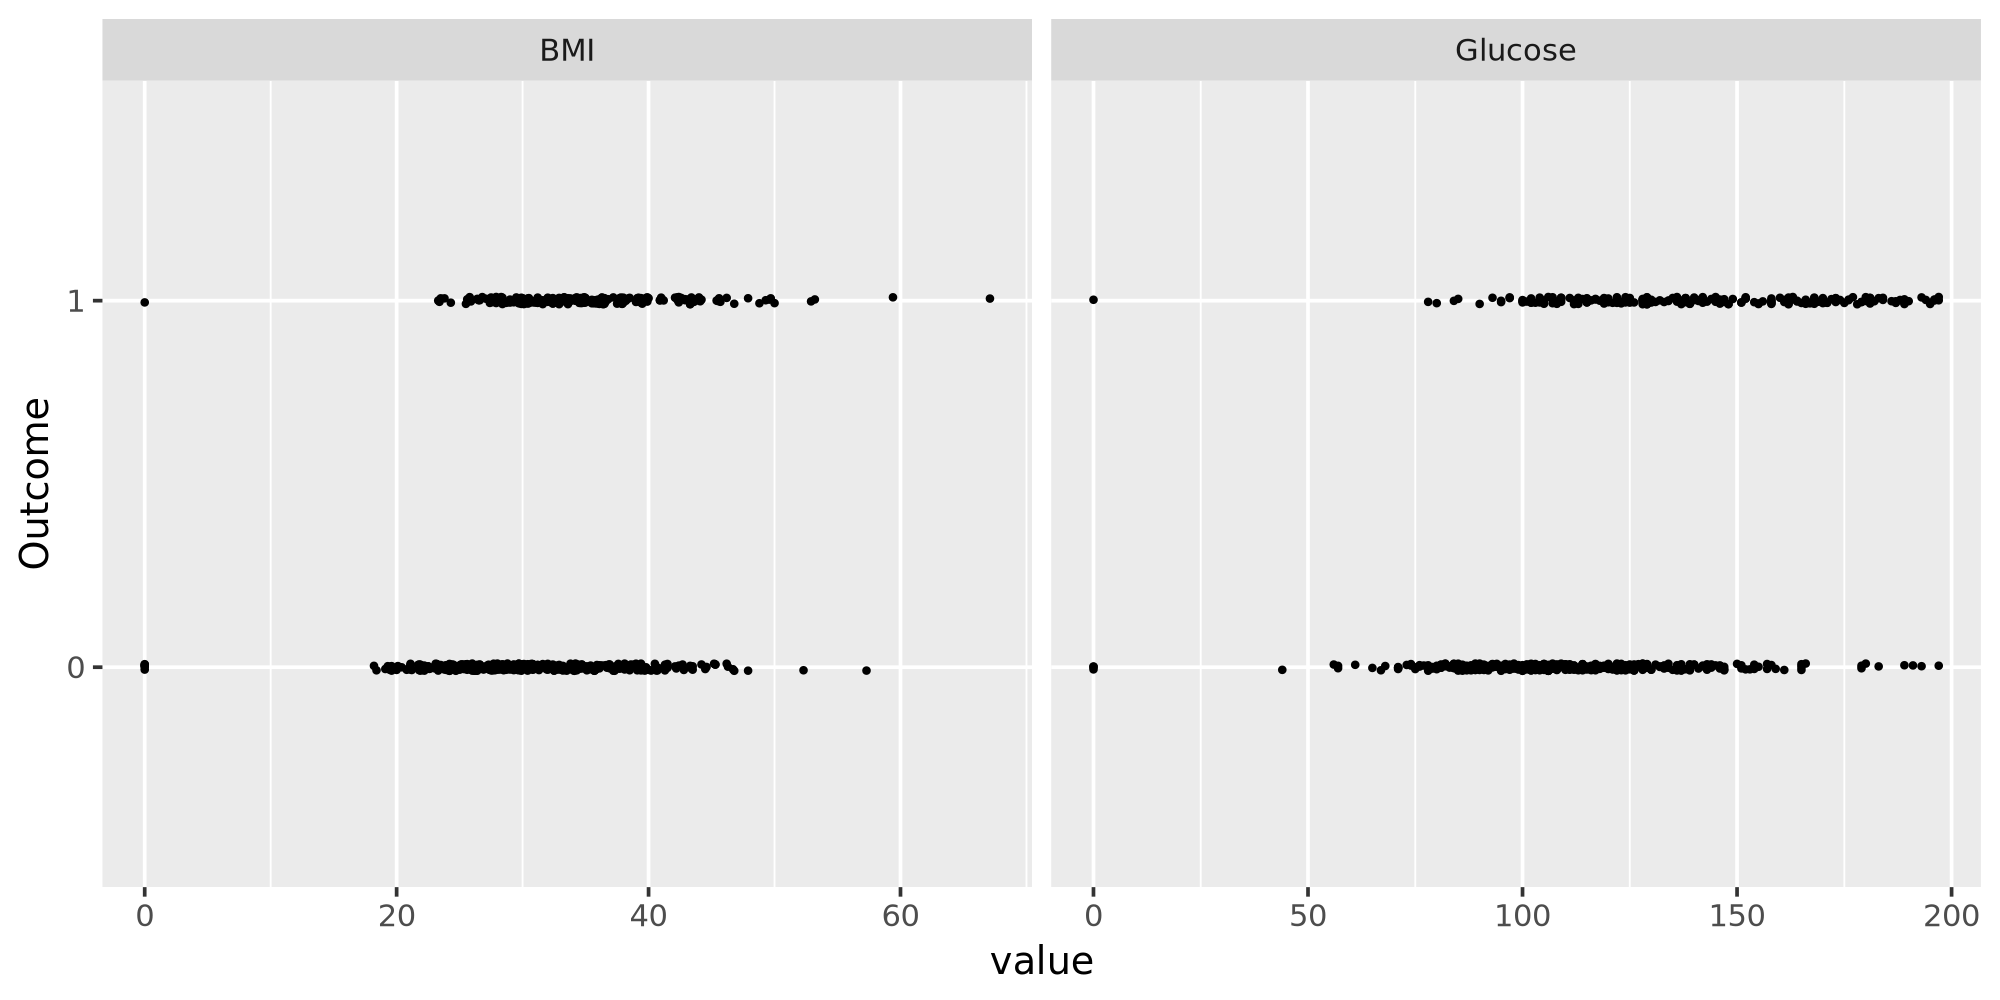

In [47]:
ggplot(data = plot_df, mapping = aes(x = value, y = Outcome)) +
  geom_point(position = position_jitter(width = 0, height = 0.01), size = 0.5) +
  facet_wrap(~name, ncol = 2, scales = 'free_x')



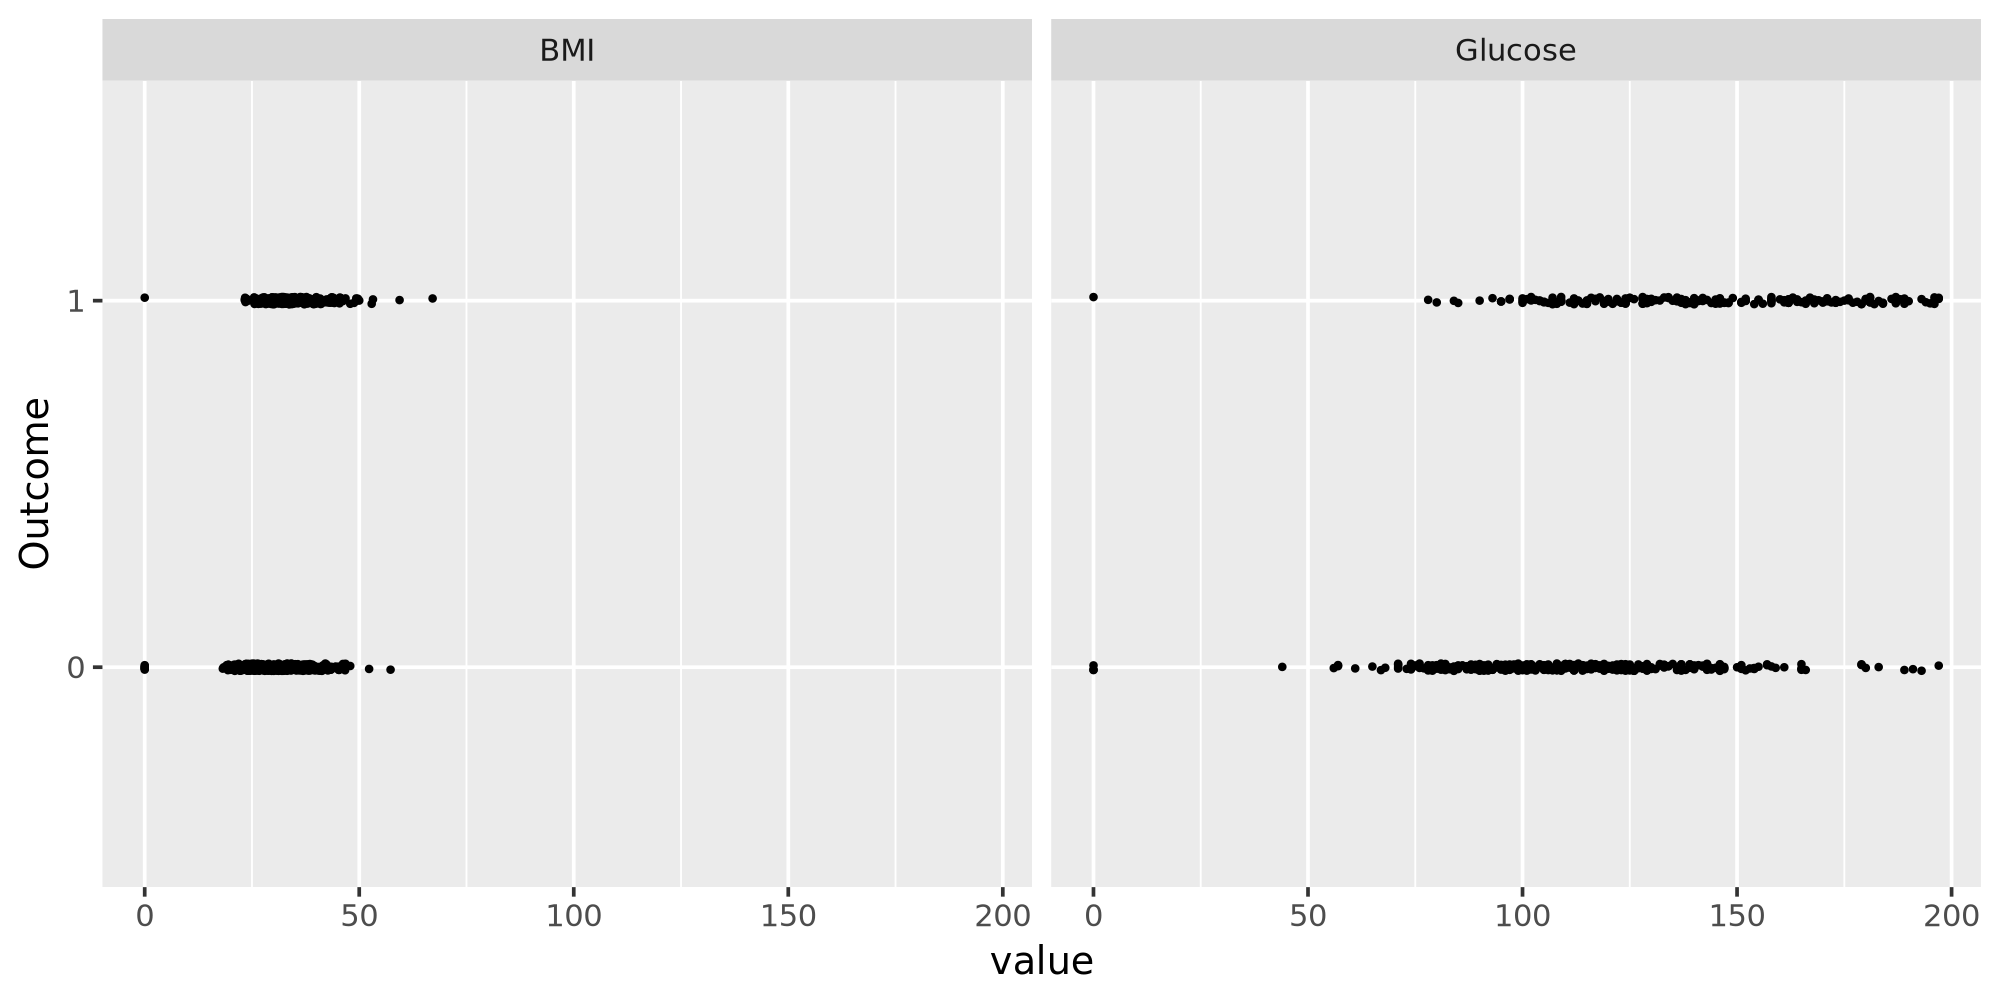

In [48]:
ggplot(data = plot_df, mapping = aes(x = value, y = Outcome)) +
  geom_point(position = position_jitter(width = 0, height = 0.01), size = 0.5) +
  facet_wrap(~name, ncol = 2)

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

The scaling of both charts will become the same on the x axis, i.e. it'll adapt the scaling of the x axis in the BMI Level vs Outcome scatterplot to the scaling of the x axis in the Glocose Level vs Outcome scatterplot (i.e. both charts will show a 0-200 scale on the x axis, because this was the wider scale that fit the values on the Glocose Level vs Outcome scatterplot originally).
Apparently it is better to include the scales = 'free_x' argument in the facet_wrap function as it will adapt the scale to the underlying data and this will make it easier to visualize and interpret the data (the dots will look less overlapped/jammed).

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [49]:
rec = recipe(Outcome ~ BMI + Glucose, data = diabetes_train)

rec




── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



In [50]:
rec_prepped  = prep(rec, diabetes_train) 

rec_prepped |> 
    juice() |>
    head()

BMI,Glucose,Outcome
<dbl>,<dbl>,<fct>
26.6,85,0
28.1,89,0
25.6,116,0
37.6,110,0
43.3,103,0
39.3,126,0


In [51]:
mod = logistic_reg() |> set_engine('glm')

In [52]:
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, juice(rec_prepped))

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.83063027,0.713096761,-10.981161,4.708339e-28
BMI,0.07964390,0.015401478,5.171186,2.326133e-07
Glucose,0.03671645,0.003876999,9.470330,2.789617e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [53]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.6892913,0.31070869,10,115,0,0,0,35.3,0.134,29,0
1,0.1380418,0.86195822,2,197,70,45,543,30.5,0.158,53,1
0,0.9623510,0.03764898,8,125,96,0,0,0.0,0.232,54,1
0,0.6384616,0.36153840,10,139,80,0,0,27.1,1.441,57,0
0,0.8544163,0.14558366,7,100,0,0,0,30.0,0.484,32,1
1,0.4626691,0.53733094,0,118,84,47,230,45.8,0.551,31,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [54]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 107  33
         1  18  34

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**
There were 67 individuals who had diabetes in the test data.
From these 67 individuals 34 (i.e. 51%) were also predicted to have diabetes (whereas 33 from these 67 individuals were predicted not to have diabetes).
There were 52 individuals in the test data, which were predicted to have diabetes, but 18 of them (i.e. 35%) actually did not have diabetes.